In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Manali Rane\Downloads\Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='HousePrice.html')

C:\Users\Manali Rane\AppData\Local\Temp\ipykernel_35228\3840229623.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df = df.drop_duplicates()

In [8]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [9]:
df['location'].value_counts()

Whitefield                        523
Sarjapur  Road                    379
Electronic City                   287
Kanakpura Road                    249
Thanisandra                       229
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [10]:
df['total_sqft'].value_counts()

1200           808
1100           210
1500           202
2400           196
600            178
              ... 
2563 - 2733      1
2005             1
605 - 624        1
4260 - 4408      1
4689             1
Name: total_sqft, Length: 2117, dtype: int64

<Axes: >

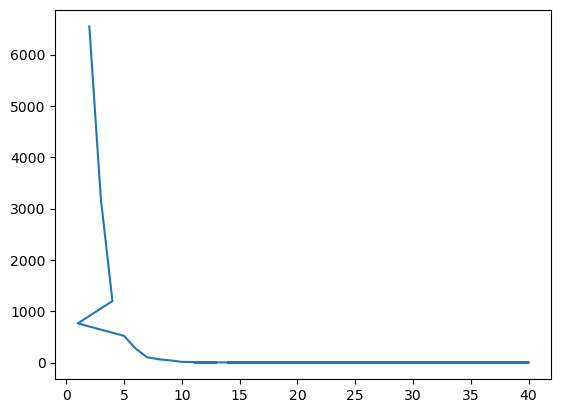

In [11]:
df['bath'].value_counts().plot(kind='line')

In [12]:
df['area_type'].value_counts()

Super built-up  Area    8317
Built-up  Area          2398
Plot  Area              1989
Carpet  Area              87
Name: area_type, dtype: int64

<Axes: >

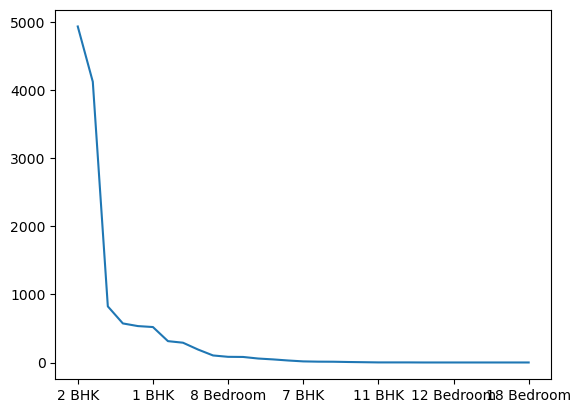

In [13]:
df['size'].value_counts().plot(kind='line')

In [14]:
df['availability'].value_counts()

Ready To Move    10172
18-May             292
18-Dec             284
18-Apr             269
18-Aug             187
                 ...  
16-Oct               1
15-Dec               1
15-Jun               1
16-Jul               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [15]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [16]:
df['location'] = df['location'].fillna('Whitefield')

C:\Users\Manali Rane\AppData\Local\Temp\ipykernel_35228\282810325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location'] = df['location'].fillna('Whitefield')


In [17]:
df.isnull().sum()

area_type          0
availability       0
location           0
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [18]:
df.drop(columns='society',inplace=True)

C:\Users\Manali Rane\AppData\Local\Temp\ipykernel_35228\3259973245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='society',inplace=True)


In [19]:
df.isnull().sum()

area_type         0
availability      0
location          0
size             16
total_sqft        0
bath             73
balcony         605
price             0
dtype: int64

In [20]:
df['bath'] = df['bath'].fillna(df['bath'].median())

C:\Users\Manali Rane\AppData\Local\Temp\ipykernel_35228\456985971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bath'] = df['bath'].fillna(df['bath'].median())


In [21]:
df.isnull().sum()

area_type         0
availability      0
location          0
size             16
total_sqft        0
bath              0
balcony         605
price             0
dtype: int64

In [22]:
df['balcony'] = df['balcony'].fillna(df['balcony'].median)

C:\Users\Manali Rane\AppData\Local\Temp\ipykernel_35228\2297767632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balcony'] = df['balcony'].fillna(df['balcony'].median)


In [23]:
df.isnull().sum()

area_type        0
availability     0
location         0
size            16
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

In [24]:
df['size'].value_counts()

2 BHK         4931
3 BHK         4120
4 Bedroom      824
4 BHK          574
3 Bedroom      535
1 BHK          521
2 Bedroom      314
5 Bedroom      291
6 Bedroom      191
1 Bedroom      104
8 Bedroom       84
7 Bedroom       82
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [25]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [26]:
df.drop(columns=['area_type','availability','balcony'],inplace=True)

C:\Users\Manali Rane\AppData\Local\Temp\ipykernel_35228\3686763646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['area_type','availability','balcony'],inplace=True)


In [27]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12791 entries, 0 to 13318
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12791 non-null  object 
 1   size        12775 non-null  object 
 2   total_sqft  12791 non-null  object 
 3   bath        12791 non-null  float64
 4   price       12791 non-null  float64
dtypes: float64(2), object(3)
memory usage: 599.6+ KB


In [29]:
df['size'] = df['size'].fillna('2 BHK')

C:\Users\Manali Rane\AppData\Local\Temp\ipykernel_35228\635702494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size'] = df['size'].fillna('2 BHK')


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12791 entries, 0 to 13318
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12791 non-null  object 
 1   size        12791 non-null  object 
 2   total_sqft  12791 non-null  object 
 3   bath        12791 non-null  float64
 4   price       12791 non-null  float64
dtypes: float64(2), object(3)
memory usage: 599.6+ KB


In [31]:
df.sample(10)

,location,size,total_sqft,bath,price
3560,Whitefield,3 BHK,1350,3.0,54.0
13117,Chandapura,3 Bedroom,1200,3.0,65.0
10147,Poornapragna Housing Society Layout,3 Bedroom,2400,3.0,360.0
10930,Chikkadunnasandra,3 BHK,1397,2.0,52.0
11494,8th Phase JP Nagar,2 BHK,1510,2.0,80.0
3599,MLA Layout,2 BHK,970,2.0,40.0
8246,Ramagondanahalli,2 BHK,1151,2.0,43.6
11421,Devasandra Extension,2 BHK,1090,2.0,32.0
9445,Sarjapur,2 BHK,1200,2.0,62.0
9715,Brooke Bond First Cross,3 BHK,1721,3.0,93.0


In [32]:
df['bath'].value_counts()

2.0     6619
3.0     3180
4.0     1198
1.0      762
5.0      520
6.0      271
7.0      102
8.0       64
9.0       42
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [33]:
df['bath'] = df['bath'].astype(int)

C:\Users\Manali Rane\AppData\Local\Temp\ipykernel_35228\4019345249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bath'] = df['bath'].astype(int)


In [34]:
df['bhk'] = df['size'].str.split().str.get(0).astype(int)

C:\Users\Manali Rane\AppData\Local\Temp\ipykernel_35228\4032793484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bhk'] = df['size'].str.split().str.get(0).astype(int)


In [35]:
df.sample(5)

,location,size,total_sqft,bath,price,bhk
6248,Lakkasandra Extension,5 Bedroom,1280,3,250.0,5
6669,Hoodi,3 BHK,1490,3,79.0,3
5640,Kundalahalli,2 BHK,1047,2,83.0,2
10488,2 Bedroom Furnished Farm House in Kolar Road,2 Bedroom,1.25Acres,2,200.0,2
6281,Devi Nagar,2 BHK,1100,2,61.0,2


In [36]:
df[df['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27,230.0,27
4684,Munnekollal,43 Bedroom,2400,40,660.0,43


In [37]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [38]:
def convertRange(x):
    temp = x.split('-')
    if temp == 2:
        return(float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [39]:
df['total_sqft'] = df['total_sqft'].apply(convertRange)

C:\Users\Manali Rane\AppData\Local\Temp\ipykernel_35228\1223326208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sqft'] = df['total_sqft'].apply(convertRange)


In [40]:
df['total_sqft'].unique()

array([1056., 2600., 1440., ..., 2758.,  774., 4689.])

In [41]:
df['price_per_sqft'] = df['price']*100000 / df['total_sqft']

C:\Users\Manali Rane\AppData\Local\Temp\ipykernel_35228\706258907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqft'] = df['price']*100000 / df['total_sqft']


In [42]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250.000000


In [43]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12545.000000,12791.000000,12791.000000,12791.000000,1.254500e+04
mean,1564.984242,2.704558,114.317646,2.816824,8.068408e+03
std,1260.270912,1.354936,151.480310,1.311339,1.094751e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.298246e+03
50%,1280.000000,2.000000,73.000000,3.000000,5.500000e+03
75%,1685.000000,3.000000,121.000000,3.000000,7.422402e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [44]:
df.location.value_counts()

Whitefield                        524
Sarjapur  Road                    379
Electronic City                   287
Kanakpura Road                    249
Thanisandra                       229
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [45]:
df['location'] = df['location'].apply(lambda x:x.strip())
location_count = df['location'].value_counts()

C:\Users\Manali Rane\AppData\Local\Temp\ipykernel_35228\3333744503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location'] = df['location'].apply(lambda x:x.strip())


In [46]:
location_count_less_10 = location_count[location_count<=10]
location_count_less_10

Dairy Circle                      10
Ganga Nagar                       10
Nagadevanahalli                   10
Dodsworth Layout                  10
Sector 1 HSR Layout               10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1061, dtype: int64

In [47]:
df['location'] = df['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

C:\Users\Manali Rane\AppData\Local\Temp\ipykernel_35228\2089573732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location'] = df['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)


In [48]:
df['location'].value_counts()

other               2933
Whitefield           525
Sarjapur  Road       379
Electronic City      289
Kanakpura Road       249
                    ... 
LB Shastri Nagar      11
Thyagaraja Nagar      11
Tindlu                11
HAL 2nd Stage         11
Banjara Layout        11
Name: location, Length: 234, dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12791 entries, 0 to 13318
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        12791 non-null  object 
 1   size            12791 non-null  object 
 2   total_sqft      12545 non-null  float64
 3   bath            12791 non-null  int32  
 4   price           12791 non-null  float64
 5   bhk             12791 non-null  int32  
 6   price_per_sqft  12545 non-null  float64
dtypes: float64(3), int32(2), object(2)
memory usage: 699.5+ KB


In [50]:
df['total_sqft'] = df['total_sqft'].fillna(df['total_sqft'].median())
df['price_per_sqft'] = df['price_per_sqft'].fillna(df['price_per_sqft'].median())

C:\Users\Manali Rane\AppData\Local\Temp\ipykernel_35228\3367367400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sqft'] = df['total_sqft'].fillna(df['total_sqft'].median())
C:\Users\Manali Rane\AppData\Local\Temp\ipykernel_35228\3367367400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqft'] = df['price_per_sqft'].fillna(df['price_per_sqft'].median())


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12791 entries, 0 to 13318
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        12791 non-null  object 
 1   size            12791 non-null  object 
 2   total_sqft      12791 non-null  float64
 3   bath            12791 non-null  int32  
 4   price           12791 non-null  float64
 5   bhk             12791 non-null  int32  
 6   price_per_sqft  12791 non-null  float64
dtypes: float64(3), int32(2), object(2)
memory usage: 699.5+ KB


In [52]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12791.000000,12791.000000,12791.000000,12791.000000,1.279100e+04
mean,1559.503348,2.704558,114.317646,2.816824,8.019012e+03
std,1248.705788,1.354936,151.480310,1.311339,1.084177e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.326115e+03
50%,1280.000000,2.000000,73.000000,3.000000,5.500000e+03
75%,1672.000000,3.000000,121.000000,3.000000,7.369434e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [53]:
(df['total_sqft']/df['bhk']).describe()

count    12791.000000
mean       575.475967
std        396.750298
min          0.250000
25%        469.416667
50%        550.500000
75%        626.500000
max      26136.000000
dtype: float64

In [54]:
df = df[(df['total_sqft']/df['bhk']) >= 300]

In [55]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12046.000000,12046.000000,12046.000000,12046.000000,12046.000000
mean,1595.656925,2.570812,113.202490,2.659223,6366.397307
std,1273.048363,1.089178,154.583632,0.987599,4213.334319
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1125.000000,2.000000,49.955000,2.000000,4264.962978
50%,1300.000000,2.000000,70.000000,3.000000,5407.410017
75%,1700.000000,3.000000,120.000000,3.000000,6939.412823
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [56]:
df.shape

(12046, 7)

In [57]:
df['price_per_sqft'].describe()

count     12046.000000
mean       6366.397307
std        4213.334319
min         267.829813
25%        4264.962978
50%        5407.410017
75%        6939.412823
max      176470.588235
Name: price_per_sqft, dtype: float64

In [58]:
df = df[(df['price_per_sqft'] >= 2000) & (df['price_per_sqft'] <= 11000)]
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250.000000


In [59]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,11025.000000,11025.000000,11025.000000,11025.000000,11025.000000
mean,1499.093194,2.475646,86.899358,2.580408,5465.565749
std,864.421061,0.992886,71.252321,0.916159,1749.075857
min,300.000000,1.000000,9.000000,1.000000,2000.000000
25%,1108.000000,2.000000,48.000000,2.000000,4189.636163
50%,1280.000000,2.000000,67.000000,2.000000,5200.217037
75%,1635.000000,3.000000,100.000000,3.000000,6432.748538
max,30400.000000,16.000000,2100.000000,16.000000,11000.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11025 entries, 0 to 13318
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        11025 non-null  object 
 1   size            11025 non-null  object 
 2   total_sqft      11025 non-null  float64
 3   bath            11025 non-null  int32  
 4   price           11025 non-null  float64
 5   bhk             11025 non-null  int32  
 6   price_per_sqft  11025 non-null  float64
dtypes: float64(3), int32(2), object(2)
memory usage: 602.9+ KB


In [61]:
df['bath'].value_counts()

2     6403
3     2777
4      729
1      668
5      261
6      117
7       33
8       20
9       10
12       3
10       2
16       1
13       1
Name: bath, dtype: int64

In [62]:
df = df[df['bath']<7]

In [63]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10955.000000,10955.000000,10955.000000,10955.000000,10955.000000
mean,1481.778225,2.439799,86.084840,2.548882,5467.592499
std,825.155538,0.878976,69.861357,0.815037,1747.066714
min,300.000000,1.000000,9.000000,1.000000,2000.000000
25%,1105.000000,2.000000,48.000000,2.000000,4192.212966
50%,1280.000000,2.000000,66.000000,2.000000,5204.081633
75%,1620.500000,3.000000,99.260000,3.000000,6432.748538
max,30400.000000,6.000000,2100.000000,8.000000,11000.000000


In [64]:
df.drop(columns=['size','price_per_sqft'],inplace=True)

In [65]:
df

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2,39.07,2
1,Chikka Tirupathi,2600.0,5,120.00,4
2,Uttarahalli,1440.0,2,62.00,3
3,Lingadheeranahalli,1521.0,3,95.00,3
4,Kothanur,1200.0,2,51.00,2
...,...,...,...,...,...
13312,Bellandur,1262.0,2,47.00,2
13314,Green Glen Layout,1715.0,3,112.00,3
13315,Whitefield,3453.0,4,231.00,5
13317,Raja Rajeshwari Nagar,1141.0,2,60.00,2


In [66]:
df['location'].value_counts()

other                   2165
Whitefield               489
Sarjapur  Road           358
Electronic City          277
Kanakpura Road           247
                        ... 
Thyagaraja Nagar           4
1st Block Jayanagar        3
Giri Nagar                 2
2nd Stage Nagarbhavi       2
HAL 2nd Stage              1
Name: location, Length: 233, dtype: int64

In [67]:
df['location'] = df['location'].apply(lambda x:x.strip())
location_count = df['location'].value_counts()
location_count_less_10 = location_count[location_count<10]
location_count_less_10

Judicial Layout          9
Shampura                 9
Kammanahalli             9
Tindlu                   9
Chikkabanavar            9
Cox Town                 9
Cooke Town               9
Karuna Nagar             9
ISRO Layout              8
Shivaji Nagar            8
Banjara Layout           8
Laggere                  8
Banashankari Stage II    7
Chamrajpet               7
Benson Town              7
Nagasandra               7
Vishwapriya Layout       7
Kodigehalli              6
5th Block Hbr Layout     6
Vishveshwarya Layout     6
Mahalakshmi Layout       5
Sarakki Nagar            4
Thyagaraja Nagar         4
1st Block Jayanagar      3
Giri Nagar               2
2nd Stage Nagarbhavi     2
HAL 2nd Stage            1
Name: location, dtype: int64

In [68]:
df['location'] = df['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

In [69]:
df['location'].value_counts()

other                    2343
Whitefield                489
Sarjapur  Road            358
Electronic City           277
Kanakpura Road            247
                         ... 
Kodihalli                  10
Banashankari Stage VI      10
Jalahalli East             10
LB Shastri Nagar           10
Basaveshwara Nagar         10
Name: location, Length: 206, dtype: int64

In [70]:
df

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2,39.07,2
1,Chikka Tirupathi,2600.0,5,120.00,4
2,Uttarahalli,1440.0,2,62.00,3
3,Lingadheeranahalli,1521.0,3,95.00,3
4,Kothanur,1200.0,2,51.00,2
...,...,...,...,...,...
13312,Bellandur,1262.0,2,47.00,2
13314,Green Glen Layout,1715.0,3,112.00,3
13315,Whitefield,3453.0,4,231.00,5
13317,Raja Rajeshwari Nagar,1141.0,2,60.00,2


In [71]:
df.describe()

,total_sqft,bath,price,bhk
count,10955.000000,10955.000000,10955.000000,10955.000000
mean,1481.778225,2.439799,86.084840,2.548882
std,825.155538,0.878976,69.861357,0.815037
min,300.000000,1.000000,9.000000,1.000000
25%,1105.000000,2.000000,48.000000,2.000000
50%,1280.000000,2.000000,66.000000,2.000000
75%,1620.500000,3.000000,99.260000,3.000000
max,30400.000000,6.000000,2100.000000,8.000000


<Axes: >

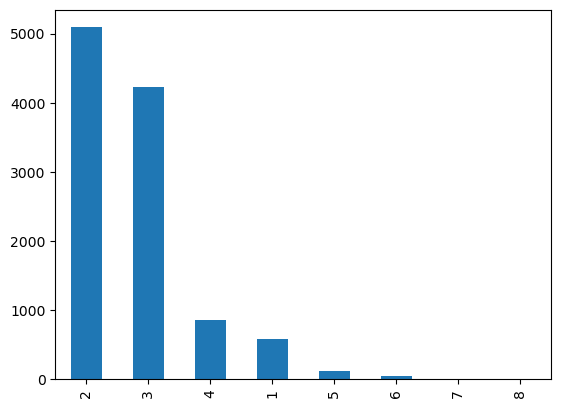

In [72]:
df['bhk'].value_counts().plot(kind='bar')

<Axes: ylabel='bhk'>

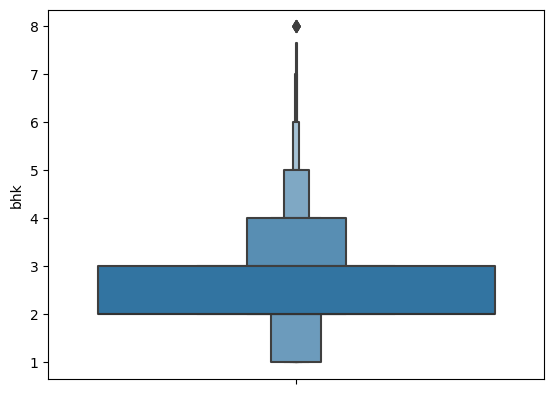

In [73]:
sns.boxenplot(y=df['bhk'])

In [74]:
df = df[df['bhk']<6]

In [75]:
df

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2,39.07,2
1,Chikka Tirupathi,2600.0,5,120.00,4
2,Uttarahalli,1440.0,2,62.00,3
3,Lingadheeranahalli,1521.0,3,95.00,3
4,Kothanur,1200.0,2,51.00,2
...,...,...,...,...,...
13312,Bellandur,1262.0,2,47.00,2
13314,Green Glen Layout,1715.0,3,112.00,3
13315,Whitefield,3453.0,4,231.00,5
13317,Raja Rajeshwari Nagar,1141.0,2,60.00,2


In [76]:
df.to_csv('Cleaned_house_prices.csv')

In [77]:
X = df.drop(columns='price',axis=1)
y = df['price']

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import r2_score

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [80]:
print(X_train.shape)
print(X_test.shape)

(8712, 4)
(2178, 4)


In [81]:
# Create a column transformer
column_trans = make_column_transformer(
    (OneHotEncoder(sparse=False), ['location']),
    remainder='passthrough'
)

In [82]:
scaler = StandardScaler()

In [83]:
lr = LinearRegression()

In [84]:
# Create a pipeline that consists of column transformer, scaler, and logistic regression
pipe = make_pipeline(column_trans, scaler, lr)

In [85]:
pipe.fit(X_train, y_train)

C:\Users\Manali Rane\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [86]:
y_pred = pipe.predict(X_test)

In [87]:
r2_score(y_test, y_pred)

0.8441449446751537